In [1]:
from __future__ import print_function
import numpy as np
from numpy import newaxis as na
import keras

from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Dropout, Embedding, LSTM
from keras.datasets import imdb
from keras.models import Model
from keras import backend as K

import matplotlib.pyplot as plt
from IPython.display import display, HTML


Using TensorFlow backend.
/usr/local/lib/python3.7/site-packages/pandas/compat/__init__.py:117: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


In [2]:
import os
import sys
import numpy as np
import keras
import shap
from keras.preprocessing.text import Tokenizer
from keras.utils import to_categorical
from keras.preprocessing.sequence import pad_sequences
from keras.layers import Activation, Conv2D, Input, Embedding, Reshape, MaxPool2D, Concatenate, Flatten, Dropout, Dense, Conv1D
from keras.layers import MaxPool1D
from keras.models import Model
from keras.callbacks import ModelCheckpoint
from keras.optimizers import Adam
import warnings
warnings.filterwarnings('ignore')

from keras.layers import Embedding
# preparing input to our model
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical

# keras layers
from keras.models import Sequential
from keras.layers import Embedding, Bidirectional, LSTM, GRU, Dense
# preparing input to our model
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical

# keras layers
from keras.models import Sequential
from keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Dense

In [3]:
# Let's import and prep the datasets
import pandas as pd

# Import the datasets 
train=pd.read_csv('data/train.csv')
test=pd.read_csv('data/test.csv')

# Handle missing values
test=test.fillna(' ')
train=train.fillna(' ')

# Have a glance at our training set
#train.info()
#train.head()

frames = [train, test]
fullDF = pd.concat(frames)

fullDF.info()
fullDF.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8560 entries, 0 to 2139
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   tweet        8560 non-null   object
 1   label        8560 non-null   object
 2   target       8560 non-null   int64 
 3   clean_tweet  8560 non-null   object
dtypes: int64(1), object(3)
memory usage: 334.4+ KB


,tweet,label,target,clean_tweet
0,The CDC currently reports 99031 deaths. In gen...,real,0,cdc currently reports deaths general discrepan...
1,States reported 1121 deaths a small rise from ...,real,0,states reported deaths small rise last tuesday...
2,Politically Correct Woman (Almost) Uses Pandem...,fake,1,politically correct woman almost uses pandemic...
3,#IndiaFightsCorona: We have 1524 #COVID testin...,real,0,india fights corona covid-19 testing laborator...
4,Populous states can generate large case counts...,real,0,populous states generate large case counts loo...


In [4]:
max_features = 10000

maxlen = 30
batch_size = 32

In [5]:
max_length = fullDF['tweet'].apply(len).min() - 1
max_length

17

In [6]:
tokenizer  = Tokenizer(num_words = max_features)
tokenizer.fit_on_texts(train.clean_tweet)
train_seq =  tokenizer.texts_to_sequences(train.clean_tweet)
test_seq =  tokenizer.texts_to_sequences(test.clean_tweet)

word_index = tokenizer.word_index
print("Unique words : {}".format(len(word_index)))

x_train = pad_sequences(train_seq, maxlen=20, dtype='int32', padding='post') #maxlen = maxlen, padding='post')
x_test = pad_sequences(test_seq, maxlen=20, dtype='int32', padding='post') #maxlen = maxlen, padding='post')
#test = pad_sequences(sequences, maxlen = MAX_SEQUENCE_LENGTH)

# keep original clf value
#labels_clf = labels
# transform label to one hot encoding
y_train = to_categorical(np.asarray(train.target))
y_test = to_categorical(np.asarray(test.target))
print('Shape of training data tensor:', x_train.shape)
print('Shape of training label tensor:', y_train.shape)

Unique words : 14619
Shape of training data tensor: (6420, 20)
Shape of training label tensor: (6420, 2)


In [7]:
print('Shape of test data tensor:', x_test.shape)
print('Shape of test label tensor:', y_test.shape)

Shape of test data tensor: (2140, 20)
Shape of test label tensor: (2140, 2)


In [8]:
# split the data into a training set and a validation set
indices = np.arange(data.shape[0])
np.random.shuffle(indices)
data = data[indices]
labels = labels[indices]
nb_validation_samples = int(0.2 * data.shape[0])

x_train = data[:-nb_validation_samples]
y_train = labels[:-nb_validation_samples]
x_test = data[-nb_validation_samples:]
y_test = labels[-nb_validation_samples:]

NameError: name 'data' is not defined

In [40]:
model = Sequential()
model.add(Embedding(10000, 128, dropout=0.2))#, mask_zero=True))
model.add(LSTM(64))
model.add(Dropout(0.5))
model.add(Dense(2, activation='sigmoid'))

# try using different optimizers and different optimizer configs
model.compile('adam', 'binary_crossentropy', metrics=['accuracy'])

model.summary()

print("Traning Model...")
history = model.fit(x_train, y_train, batch_size=batch_size, epochs=50, verbose=1, validation_data=(x_test, y_test))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, None, 128)         1280000   
_________________________________________________________________
lstm_2 (LSTM)                (None, 64)                49408     
_________________________________________________________________
dropout_2 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 130       
Total params: 1,329,538
Trainable params: 1,329,538
Non-trainable params: 0
_________________________________________________________________
Traning Model...
Train on 6420 samples, validate on 2140 samples
Epoch 1/50
6420/6420 [==============================] - 8s 1ms/step - loss: 0.3477 - acc: 0.8478 - val_loss: 0.2059 - val_acc: 0.9147
Epoch 2/50
6420/6420 [==============================] - 7s 1ms/st

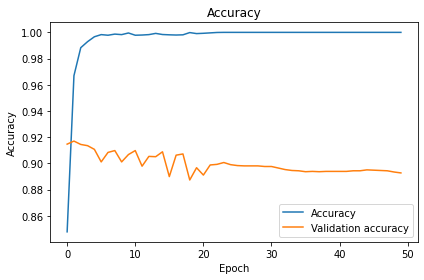

In [41]:
import matplotlib.pyplot as plt

plt.plot(history.history['acc'], label="Accuracy")
plt.plot(history.history['val_acc'], label="Validation accuracy")
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.tight_layout()
plt.show()

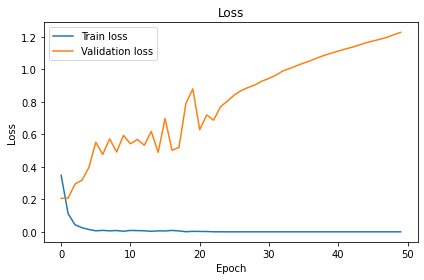

In [42]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label="Train loss")
plt.plot(history.history['val_loss'], label="Validation loss")
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.tight_layout()
plt.show()

In [43]:
results = model.evaluate(x_test, y_test)

2140/2140 [==============================] - 0s 140us/step


In [12]:
results

[0.4454265108767235, 0.9116822432134754]

In [13]:
def get_layer_output(layer_name, data):
    # https://keras.io/getting-started/faq/#how-can-i-obtain-the-output-of-an-intermediate-layer
    intermediate_layer_model = keras.Model(inputs=model.input,
                                     outputs=model.get_layer(layer_name).output)
    return intermediate_layer_model.predict(data)  

In [18]:
names = [weight.name for layer in model.layers for weight in layer.weights]
print(names)
weights = model.get_weights()

# suppress scientific notation
np.set_printoptions(suppress=True)
for name, weight in zip(names, weights):
    if name == 'lstm_1/kernel:0':
        kernel_0 = weight
    if name == 'lstm_1/recurrent_kernel:0':
        recurrent_kernel_0 = weight
    if name == 'lstm_1/bias:0':
        bias_0 = weight
    elif name == 'dense_1/kernel:0':
        output = weight

['embedding_1/embeddings:0', 'lstm_1/kernel:0', 'lstm_1/recurrent_kernel:0', 'lstm_1/bias:0', 'dense_1/kernel:0', 'dense_1/bias:0']


In [19]:
print("kernel_0", kernel_0.shape)
print("recurrent_kernel_0", recurrent_kernel_0.shape)
print("bias_0", bias_0.shape)
print("output", output.shape)

# self.Wxh_Left (240, 60)
# self.Whh_Left (240, 60)
# self.bxh_Left (240,)
# self.Why_Left (5, 60)

kernel_0 (128, 256)
recurrent_kernel_0 (64, 256)
bias_0 (256,)
output (64, 2)


In [20]:
Wxh = kernel_0.T  # shape 4d*e
Whh = recurrent_kernel_0.T  # shape 4d
bxh = bias_0.T  # shape 4d 
Why = output.T

print("Wxh", Wxh.shape)
print("Whh", Whh.shape)
print("bxh", bxh.shape)
print("Why", Why.shape)

Wxh (256, 128)
Whh (256, 64)
bxh (256,)
Why (2, 64)


In [21]:
def html_heatmap (words, scores, cmap_name="bwr"):
    """
    Return word-level heatmap in HTML format,
    with words being the list of words (as string),
    scores the corresponding list of word-level relevance values,
    and cmap_name the name of the matplotlib diverging colormap.
    """
    
    colormap  = plt.get_cmap(cmap_name)
     
    #assert len(words)==len(scores)
    max_s     = max(scores)
    min_s     = min(scores)
    
    output_text = ""
    
    for idx, w in enumerate(words):
        score       = rescale_score_by_abs(scores[idx], max_s, min_s)
        output_text = output_text + span_word(w, score, colormap) + " "
    
    return output_text + "\n"

def rescale_score_by_abs (score, max_score, min_score):
    """
    Normalize the relevance value (=score), accordingly to the extremal relevance values (max_score and min_score), 
    for visualization with a diverging colormap.
    i.e. rescale positive relevance to the range [0.5, 1.0], and negative relevance to the range [0.0, 0.5],
    using the highest absolute relevance for linear interpolation.
    """
    
    # CASE 1: positive AND negative scores occur --------------------
    if max_score>0 and min_score<0:
    
        if max_score >= abs(min_score):   # deepest color is positive
            if score>=0:
                return 0.5 + 0.5*(score/max_score)
            else:
                return 0.5 - 0.5*(abs(score)/max_score)

        else:                             # deepest color is negative
            if score>=0:
                return 0.5 + 0.5*(score/abs(min_score))
            else:
                return 0.5 - 0.5*(score/min_score)   
    
    # CASE 2: ONLY positive scores occur -----------------------------       
    elif max_score>0 and min_score>=0: 
        if max_score == min_score:
            return 1.0
        else:
            return 0.5 + 0.5*(score/max_score)
    
    # CASE 3: ONLY negative scores occur -----------------------------
    elif max_score<=0 and min_score<0: 
        if max_score == min_score:
            return 0.0
        else:
            return 0.5 - 0.5*(score/min_score)
          

def getRGB (c_tuple):
    return "#%02x%02x%02x"%(int(c_tuple[0]*255), int(c_tuple[1]*255), int(c_tuple[2]*255))

     
def span_word (word, score, colormap):
    return "<span style=\"background-color:"+getRGB(colormap(score))+"\">"+word+"</span>"

In [22]:
def lrp_linear(hin, w, b, hout, Rout, bias_nb_units, eps, bias_factor=0.0, debug=False):
    """
    LRP for a linear layer with input dim D and output dim M.
    Args:
    - hin:            forward pass input, of shape (D,)
    - w:              connection weights, of shape (D, M)
    - b:              biases, of shape (M,)
    - hout:           forward pass output, of shape (M,) (unequal to np.dot(w.T,hin)+b if more than one incoming layer!)
    - Rout:           relevance at layer output, of shape (M,)
    - bias_nb_units:  total number of connected lower-layer units (onto which the bias/stabilizer contribution is redistributed for sanity check)
    - eps:            stabilizer (small positive number)
    - bias_factor:    set to 1.0 to check global relevance conservation, otherwise use 0.0 to ignore bias/stabilizer redistribution (recommended)
    Returns:
    - Rin:            relevance at layer input, of shape (D,)
    """
    sign_out = np.where(hout[na,:]>=0, 1., -1.) # shape (1, M)
    
    numer    = (w * hin[:,na]) + ( bias_factor * (b[na,:]*1. + eps*sign_out*1.) / bias_nb_units ) # shape (D, M)
    # Note: here we multiply the bias_factor with both the bias b and the stabilizer eps since in fact
    # using the term (b[na,:]*1. + eps*sign_out*1.) / bias_nb_units in the numerator is only useful for sanity check
    # (in the initial paper version we were using (bias_factor*b[na,:]*1. + eps*sign_out*1.) / bias_nb_units instead)
    
    denom    = hout[na,:] + (eps*sign_out*1.)   # shape (1, M)
    
    message  = (numer/denom) * Rout[na,:]       # shape (D, M)
    
    Rin      = message.sum(axis=1)              # shape (D,)
    
    if debug:
        print("local diff: ", Rout.sum() - Rin.sum())
    # Note: 
    # - local  layer   relevance conservation if bias_factor==1.0 and bias_nb_units==D (i.e. when only one incoming layer)
    # - global network relevance conservation if bias_factor==1.0 and bias_nb_units set accordingly to the total number of lower-layer connections 
    # -> can be used for sanity check
    
    return Rin

In [23]:
def LRP(target_data, target_class) :
    
    #원본 소스에서 E embedding은 전체에 대한 단어 사전이고, x는 embedding된 인풋이다.  
    # w_indices [109, 11995, 25, 18263, 25, 973, 3138, 6389, 372]

    x = get_layer_output('embedding_1', target_data).squeeze(axis=1)
    e = x.shape[1]

   ################# forword
    T = target_data.shape[0]
    d = int(256/4)  # hidden units
    C = Why.shape[0] # number of classes
    
    idx    = np.hstack((np.arange(0,d), np.arange(2*d,4*d))).astype(int) # indices of gates i,f,o together
    idx_i, idx_g, idx_f, idx_o = np.arange(0,d), np.arange(d,2*d), np.arange(2*d,3*d), np.arange(3*d,4*d) # indices of gates i,g,f,o separately

    h  = np.zeros((T,d))
    c  = np.zeros((T,d))

    gates_xh  = np.zeros((T, 4*d))  
    gates_hh  = np.zeros((T, 4*d)) 
    gates_pre = np.zeros((T, 4*d))  
    gates     = np.zeros((T, 4*d))  

    for t in range(T):
        gates_xh[t]     = np.dot(Wxh, x[t])
        gates_hh[t]     = np.dot(Whh, h[t-1])
        gates_pre[t]    = gates_xh[t] + gates_hh[t] + bxh
        gates[t, idx]    = 1.0/(1.0 + np.exp(- gates_pre[t,idx]))
        gates[t,idx_g]  = np.tanh(gates_pre[t,idx_g]) 
        c[t]            = gates[t,idx_f]*c[t-1] + gates[t,idx_i]*gates[t,idx_g]
        h[t]            = gates[t,idx_o]*np.tanh(c[t])

    s = np.dot(Why, h[t])    

    ################# backwork
    dx     = np.zeros(x.shape)

    dh          = np.zeros((T, d))
    dc          = np.zeros((T, d))
    dgates_pre  = np.zeros((T, 4*d))  # gates pre-activation
    dgates      = np.zeros((T, 4*d))  # gates activation

    ds               = np.zeros((C))
    ds[target_class] = 1.0
    dy               = ds.copy()

    #맨처음을 0으로 시작하지 않게 위한조치
    dh[T-1]     = np.dot(Why.T, dy)

    for t in reversed(range(T)): 
        dgates[t,idx_o]    = dh[t] * np.tanh(c[t])  # do[t]
        dc[t]             += dh[t] * gates[t,idx_o] * (1.-(np.tanh(c[t]))**2) # dc[t]
        dgates[t,idx_f]    = dc[t] * c[t-1]         # df[t]
        dc[t-1]            = dc[t] * gates[t,idx_f] # dc[t-1]
        dgates[t,idx_i]    = dc[t] * gates[t,idx_g] # di[t]
        dgates[t,idx_g]    = dc[t] * gates[t,idx_i] # dg[t]
        dgates_pre[t,idx]  = dgates[t,idx] * gates[t,idx] * (1.0 - gates[t,idx]) # d ifo pre[t]
        dgates_pre[t,idx_g]= dgates[t,idx_g] *  (1.-(gates[t,idx_g])**2) # d g pre[t]
        dh[t-1]            = np.dot(Whh.T, dgates_pre[t])
        dx[t]              = np.dot(Wxh.T, dgates_pre[t])

    ################# LRP
    eps=0.001 
    bias_factor=0.0
    Rx  = np.zeros(x.shape)
    Rh  = np.zeros((T+1, d))
    Rc  = np.zeros((T+1, d))
    Rg  = np.zeros((T,   d)) # gate g only

    Rout_mask            = np.zeros((C))
    Rout_mask[target_class] = 1.0  

    # format reminder: lrp_linear(hin, w, b, hout, Rout, bias_nb_units, eps, bias_factor)
    Rh[T-1]  = lrp_linear(h[T-1], Why.T, np.zeros((C)), s, s*Rout_mask, 2*d, eps, bias_factor, debug=False)  

    for t in reversed(range(T)):
        Rc[t]   += Rh[t]
        Rc[t-1]  = lrp_linear(gates[t,idx_f]*c[t-1], np.identity(d), np.zeros((d)), c[t], Rc[t], 2*d, eps, bias_factor, debug=False)
        Rg[t]    = lrp_linear(gates[t,idx_i]*gates[t,idx_g], np.identity(d), np.zeros((d)), c[t], Rc[t], 2*d, eps, bias_factor, debug=False)
        Rx[t]    = lrp_linear(x[t], Wxh[idx_g].T, bxh[idx_g], gates_pre[t,idx_g], Rg[t], d+e, eps, bias_factor, debug=False)
        Rh[t-1]  = lrp_linear(h[t-1], Whh[idx_g].T, bxh[idx_g], gates_pre[t,idx_g], Rg[t], d+e, eps, bias_factor, debug=False)    

    return s, dx, Rx, Rh[-1].sum()

In [24]:
#word_index = imdb.get_word_index()
index_word = {v:k for k,v in word_index.items()}

#values = ','.join(str(v) for v in value_list)

def index_to_word(word):
    full_sentence = ' '.join(index_word.get(w) for w in word)
    return full_sentence.split()

In [25]:
def int_to_str(target_class):
    if target_class == 0:
        return "Real"
    else:
        return "Fake"

In [26]:
predictions = model.predict(x_test)

In [27]:
fake_list = []
real_list = []

for i in range(len(y_test)):
    if np.argmax(predictions[i]) == 1:
        fake_list.append(i)
    else:
        real_list.append(i)

In [24]:
index_word = {v: k for k, v in word_index.items()} # map back
seqs = x_test
words = []

def seqToWords():
    for seq in seqs:
        if len(seq):
            words.append(index_word.get(seq[0]))
        else:
            words.append(' ')    
            
    return words

In [94]:
words = seqToWords()

In [53]:
# Creating a reverse dictionary
reverse_word_map = dict(map(reversed, word_index.items()))

# Function takes a tokenized sentence and returns the words
def sequence_to_text(list_of_indices):
    # Looking up words in dictionary
    words = [reverse_word_map.get(letter) for letter in list_of_indices]
    
    return words

In [54]:
my_texts = list(map(sequence_to_text, x_test))
my_texts

[['chinese',
  'converting',
  'islam',
  False,
  'muslim',
  'affected',
  'coronavirus',
  'covd',
  '1',
  '9',
  'country',
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None],
 ['people',
  'diamond',
  'princess',
  'cruise',
  'ship',
  False,
  'tested',
  'negative',
  'tests',
  'japan',
  'later',
  'confirmed',
  'positive',
  'united',
  'states',
  None,
  None,
  None,
  None,
  None],
 ['covid',
  '19',
  'caused',
  'bacterium',
  'virus',
  'treated',
  'aspirin',
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None],
 ['mike',
  'pence',
  'rnc',
  'speech',
  False,
  'donald',
  'trump',
  'covid',
  '19',
  'seamless',
  'partnership',
  'governors',
  'leaves',
  'president',
  'state',
  False,
  False,
  'rnc',
  None,
  None],
 ['sky',
  'explains',
  'latest',
  'covid',
  '19',
  'data',
  'government',
  'announcement',
  'get',
  'coronavirus',
  'data',
  '👇',
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None],
 ['reason',
  'without',
  'returning',
  'negative',
  'test',
  'refuse',
  'test',
  'held',
  'period',
  'days',
  '\u2063',
  '\u2063',
  'june',
  'th',
  'exemptions',
  'compassionate',
  'grounds',
  'suspended',
  '\u2063',
  '\u2063'],
 ['less',
  'case',
  'fatality',
  'rate',
  'result',
  'supervised',
  'home',
  'isolation',
  'effective',
  'clinical',
  'treatment',
  'many',
  'states',
  'uts',
  'cfr',
  'lower',
  'national',
  'average',
  False,
  'e'],
 ['rt',
  'covid',
  '19',
  'transmission',
  False,
  'primarily',
  'direct',
  False,
  'close',
  'contact',
  'infected',
  'people',
  'saliva',
  False,
  None,
  None,
  None,
  None,
  None,
  None],
 ['news',
  'media',
  'outlet',
  False,
  False,
  'basis',
  False,
  'memo',
  'south',
  'central',
  'railway',
  'reported',
  'special',
  'train',
  'announced',
  'take',
  'stranded',
  'migrant',
  'workers',
  'home'],
 ['church',
  'services',
  'resume',
  'vaccinated',
  'says',
  'bill',
  'gates',
  '�',
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None],
 ['still',
  False,
  False,
  False,
  'without',
  'fear',
  'covid',
  'airlines',
  'stay',
  'serious',
  'safety',
  False,
  'g',
  'coronavirus',
  None,
  None,
  None,
  None,
  None,
  None],
 ['individuals',
  'recovered',
  'covid',
  '19',
  'kerala',
  'government',
  'sets',
  'first',
  'plasma',
  'bank',
  'state',
  'following',
  'steps',
  'delhi',
  'west',
  'bengal',
  'covid',
  '19',
  'coronavirus',
  'facts'],
 ['conspiracy',
  'theory',
  'audio',
  'covid',
  '19',
  'testing',
  'india',
  'circulating',
  'allegedly',
  'mla',
  False,
  'jain',
  'quick',
  'factcheck',
  'find',
  'minister',
  'already',
  'clarified',
  'mh',
  None],
 ['tomorrow',
  'april',
  'pass',
  'coronavirus',
  'deaths',
  'passed',
  'april',
  'passed',
  'march',
  'passed',
  'march',
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None],
 ['covid',
  '19',
  'testing',
  'adding',
  'pretending',
  'problem',
  'part',
  'problem',
  'pm',
  'says',
  'testing',
  'record',
  'high',
  'uk',
  'testing',
  'people',
  'european',
  'country',
  'pmqs',
  False],
 ['new',
  'tips',
  'maintaining',
  'healthy',
  'operations',
  'covid',
  '19',
  'outbreak',
  False,
  'schedules',
  'options',
  'individuals',
  'higher',
  'risk',
  'severe',
  'illness',
  'tips',
  'fnvg',
  'ep',
  False],
 ['last',
  'note',
  'washington',
  'dc',
  'total',
  'test',
  'count',
  'fell',
  'presumably',
  False,
  'antibody',
  'tests',
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None],
 ['cuomo',
  'simply',
  'saying',
  'share',
  'percent',
  'excess',
  'non',
  'used',
  'ventilators',
  'help',
  'people',
  'parts',
  'state',
  'voluntary',
  'basis',
  'would',
  'great',
  'course',
  False,
  'positive'],
 ['democrats',
  'pushing',
  False,
  'microchip',
  'hu

In [33]:
print("The degree to which each word affects the prediction of being real: ")

for index, i in enumerate(real_list):
    
    target_data = x_test[i]
    print(target_data)
    target_class = np.argmax(y_test[i])

    scores, Gx, Rx, R_rest = LRP(target_data, target_class)
    
    R_words          = np.sum(Rx, axis=1)                       # compute word-level LRP relevances
    R_words_SA       = (np.linalg.norm(Gx,ord=2, axis=0))**2   # compute word-level Sensitivity Analysis relevances
    R_words_GI       = np.dot(target_data, Gx) 
    
    try:
        words = index_to_word(target_data)
        #continue
    #words = seqToWords()
    except:
        continue

    if len(words) > 0 :
        print("Predicted label:", int_to_str(np.argmax(predictions[i])), "Actual label:", int_to_str(target_class))

        print("LRP heatmap:")
        display(HTML(html_heatmap(words, R_words)))

        print("SA heatmap:")
        display(HTML(html_heatmap(words, R_words_SA)))

        print("GI heatmap:")
        display(HTML(html_heatmap(words, R_words_GI)))

        print("-----------------------------------------------------------")

    if index == 50: 
        break

The degree to which each word affects the prediction of being real: 
[   7 4926 3875 1513 1308   42  225    9 1090 1101   17   40  338   13
    0    0    0    0    0    0]
[ 936 1027  111    1    2   38   73 2519   79    3   38  396    0    0
    0    0    0    0    0    0]
[ 925  364  823  225   44 1897   44 1735  616   43   64   64  292  124
 3763 2364 4195 5513   64   64]
Predicted label: Real Actual label: Real
LRP heatmap:


SA heatmap:


GI heatmap:


-----------------------------------------------------------
[1335  286   34  389   50  487 5879   58   68  330  367  195  121   13
  366 1639  404  149  131  182]
Predicted label: Real Actual label: Real
LRP heatmap:


SA heatmap:


GI heatmap:


-----------------------------------------------------------
[  39    1    2  291 4328 2322  254  155  108    7 3684    0    0    0
    0    0    0    0    0    0]
[ 815    1    2   19 1285 6233  910  273  910   89   37   19  266   95
  162   19    7 2205   75 5065]
Predicted label: Real Actual label: Real
LRP heatmap:


SA heatmap:


GI heatmap:


-----------------------------------------------------------
[1633   72    5  764 2178  701 1910    1    2  105 4873 2161 1363  275
   80  345  553  764 6730 5360]
Predicted label: Real Actual label: Real
LRP heatmap:


SA heatmap:


GI heatmap:


-----------------------------------------------------------
[  52  205 1056 2154   16   44  629 1344 8571  791    9    0    0    0
    0    0    0    0    0    0]
[8017 4293 4972  570  509 2491 1000  597  197 1767   91    7 1082   22
 4927 1085  122  788 2255   40]
Predicted label: Real Actual label: Fake
LRP heatmap:


SA heatmap:


GI heatmap:


-----------------------------------------------------------
[ 218 4236 1028 3636    1    2  736  620  598   20 5018 3066  436 2888
  552   13 2557  506 5889   38]
Predicted label: Real Actual label: Real
LRP heatmap:


SA heatmap:


GI heatmap:


-----------------------------------------------------------
[   6   30   14  355    5   62    4  184   13  366  297 2780  799    2
    4 3526 1265   27 7471    0]
[7527 2079   32  805  953   46   78 4477 7528  945    1    2   19   13
   88  149   19  486  174  160]
Predicted label: Real Actual label: Real
LRP heatmap:


SA heatmap:


GI heatmap:


-----------------------------------------------------------
[ 70  12 564   4  13 206  77  88 212 123 446 442 116 139 140 176 224 228
 161 447]
Predicted label: Real Actual label: Real
LRP heatmap:


SA heatmap:


GI heatmap:


-----------------------------------------------------------
[3964 3479    1   52  372    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0]
[ 463  363 2740  455  718  191  292   42 2463 2822  135   68  218 2812
 2367   60   42 1187  487  868]
Predicted label: Real Actual label: Real
LRP heatmap:


SA heatmap:


GI heatmap:


-----------------------------------------------------------
[ 292   65    1    2    4   18   92  173   13 2409  103    4   54  121
    4   18   22 2173    0    0]
[ 2  1  2  1  2  1  2  6  1  2 32  3 14 32  3  6  3 32  3 23]
Predicted label: Real Actual label: Real
LRP heatmap:


SA heatmap:


GI heatmap:


-----------------------------------------------------------
[  52   43  331 1008  266   84    9   18   13   94   28    9   86  965
   84 1643 1389   99    5 1153]
Predicted label: Real Actual label: Real
LRP heatmap:


SA heatmap:


GI heatmap:


-----------------------------------------------------------
[  39  454  167  780  496 2858   95  127 1898 1053  859 2763   20 2763
  716    0    0    0    0    0]
[ 121  450  866 4584    1    2  361 3035    5  575  250   36 1322  450
  150  114    0    0    0    0]
[ 507  211  244  729   13 2084  815  179  602  243   38  250 1577  311
    0    0    0    0    0    0]
[ 400  536  245  636  283 1411  445 2283  142  671  101  186 1521 1606
  179   11   10    8 8214 5611]
Predicted label: Real Actual label: Real
LRP heatmap:


SA heatmap:


GI heatmap:


-----------------------------------------------------------
[  36    1    2 2199  355  275   80   81  207  797    0    0    0    0
    0    0    0    0    0    0]
[5183  132 2429    1    2 5102  279    0    0    0    0    0    0    0
    0    0    0    0    0    0]
[ 72  82 843 450 406 236  95  80 349 182   1   2   0   0   0   0   0   0
   0   0]
[  26  454  167    1    2  491  483  454  167 1484 2842  695 1146  491
  127 1667  220  795  348    0]
[   4  354  233   57  443   17    4   57  443   17    4   57  443   17
    4   57 1072   17    4  252]
Predicted label: Real Actual label: Real
LRP heatmap:


SA heatmap:


GI heatmap:


-----------------------------------------------------------
[  67  226   94    9  342   16   15    9   94  136 1537  716   27  131
    0    0    0    0    0    0]
[3182    1    4   83   52   78    0    0    0    0    0    0    0    0
    0    0    0    0    0    0]
[ 664  486  165 1663  178    1    2    4  290  211 5080  348 1380  769
 6586  524  152   20 1195  235]
Predicted label: Real Actual label: Real
LRP heatmap:


SA heatmap:


GI heatmap:


-----------------------------------------------------------
[   6    1    2   35  519 2616 4442 1294 4388  746    6 2914  481  646
   35  411 2106  501    6 9102]
Predicted label: Real Actual label: Real
LRP heatmap:


SA heatmap:


GI heatmap:


-----------------------------------------------------------
[1918   74 1820  146    1    2    0    0    0    0    0    0    0    0
    0    0    0    0    0    0]
[ 16  15  17   4   1   2  15  29  55  20 314   0   0   0   0   0   0   0
   0   0]
[ 901 3699 5443  901 4009  231 3699 5443  901  558  515  526   15  199
   46  163   44    1    2 5510]
Predicted label: Real Actual label: Real
LRP heatmap:


SA heatmap:


GI heatmap:


-----------------------------------------------------------
[ 155  459 2294  979  146  765  769 5008    0    0    0    0    0    0
    0    0    0    0    0    0]
[2187  333  422 1566  450  236  372   93   20  765  193  411  575 2070
  132  142  120 1087 7317 8556]
Predicted label: Real Actual label: Real
LRP heatmap:


SA heatmap:


GI heatmap:


-----------------------------------------------------------
[ 310  182 5353 1144 1099  515  248   22 2706   33 5061 2456 1814    1
    2  755  953   22   66  270]
Predicted label: Real Actual label: Real
LRP heatmap:


SA heatmap:


GI heatmap:


-----------------------------------------------------------
[  44   36  585  483 2026    1    2  182  349    0    0    0    0    0
    0    0    0    0    0    0]
[ 825  273   91  258  513   49   41   58   43 1256   20  114  155  459
   11   10    8 2197 2791 1118]
Predicted label: Real Actual label: Real
LRP heatmap:


SA heatmap:


GI heatmap:


-----------------------------------------------------------
[   5    4  371  351 1374  390  191   25    5    4  157 1113 1049    0
    0    0    0    0    0    0]
[   5  106   60  359 2172 1508   19  247 1135  147   75 3795 4895    2
    9    0    0    0    0    0]
[1270 1739 3013    3  730  266   84  859 2385  418 1381 2846 2582 1332
 5235 1573 1618 3338  633  277]
Predicted label: Real Actual label: Real
LRP heatmap:


SA heatmap:


GI heatmap:


-----------------------------------------------------------
[2564  524  830  132 6181  348  175  142  625  671  101  186  536  245
 5791  346 2112 2532   79  764]
Predicted label: Real Actual label: Real
LRP heatmap:


SA heatmap:


GI heatmap:


-----------------------------------------------------------
[ 856  750 8798 1243   60  126   99 3964 3479 4418  174    1    2  126
   21   11   10    8  222  319]
Predicted label: Real Actual label: Real
LRP heatmap:


SA heatmap:


GI heatmap:


-----------------------------------------------------------
[  21 2181 3337  781 3259 5064  142  541  555  458 9974  886  277   32
  659  869  968  969  787 1626]
Predicted label: Real Actual label: Real
LRP heatmap:


SA heatmap:


GI heatmap:


-----------------------------------------------------------
[   1    2 4237  399 3065  403  938  151    0    0    0    0    0    0
    0    0    0    0    0    0]
[   9   28   67  269   86   95 1557 2712   27  131  157   28  287   84
  301   78  118   54  303  257]
Predicted label: Real Actual label: Real
LRP heatmap:


SA heatmap:


GI heatmap:


-----------------------------------------------------------
[1417  379   41 1022   58  198  565 1996  328  186 1670  576   28  213
 2200  316   45  124  114    0]
[ 902    4   57  903  441   57  904    4   57  853    6   30   14    6
  129  125   41   63  160 3616]
Predicted label: Real Actual label: Real
LRP heatmap:


SA heatmap:


GI heatmap:


-----------------------------------------------------------
[  17    4  184 1237   13  366   16    5    4   18   52  141   75  297
  896 1743  586  617  242  452]
Predicted label: Real Actual label: Real
LRP heatmap:


SA heatmap:


GI heatmap:


-----------------------------------------------------------
[  48   89 3953   45  493   89  190   43  286 5350   45  194 5042 3620
   66  270  208  360  406 1617]
Predicted label: Real Actual label: Real
LRP heatmap:


SA heatmap:


GI heatmap:


-----------------------------------------------------------
